<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

1、导入包

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

2.导入数据

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [6]:
y_pred

array([1])

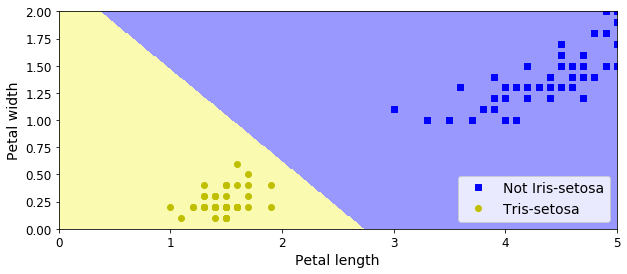

In [7]:
from matplotlib.colors import ListedColormap
a = per_clf.coef_[0][0]/per_clf.coef_[0][1]
b = per_clf.intercept_/per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs', label='Not Iris-setosa')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'yo', label='Tris-setosa')
plt.plot([axes[0], axes[1]], [a*axes[0]+b, a**axes[1]+b], 'k-', linewidth=3)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis(axes)
plt.show()

In [8]:
def logit(z):
    return 1/(1+np.exp(-z))


def relu(z):
    return np.maximum(0, z)


def deribative(f, z, eps=0.00001):
    return (f(z+eps)-f(z-eps))/(2*eps)

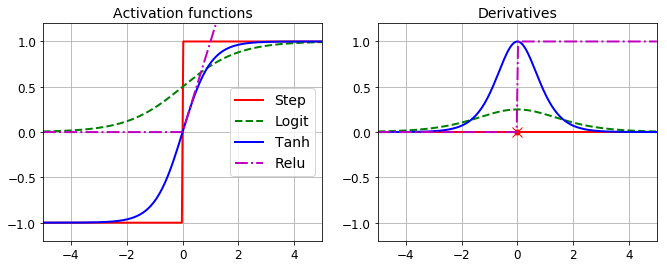

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=2, label='Step')
plt.plot(z, logit(z), 'g--', linewidth=2, label='Logit')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-.', linewidth=2, label='Relu')
plt.grid(True)
plt.legend(loc='center right', fontsize=14)
plt.title('Activation functions', fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, deribative(np.sign, z), 'r-', linewidth=2, label='Step')
plt.plot(0, 0, 'ro', markersize=5)
plt.plot(0, 0, 'rx', markersize=10)
plt.plot(z, deribative(logit, z), 'g--', linewidth=2, label='Logit')
plt.plot(z, deribative(np.tanh, z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, deribative(relu, z), 'm-.', linewidth=2, label='Relu')
plt.grid(True)
plt.title('Derivatives', fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])
plt.show()

In [10]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)


def sigmod(z):
    return 1/(1+np.exp(-z))


def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1+x2-1.5)+activation(x1+x2-0.5)-0.5)

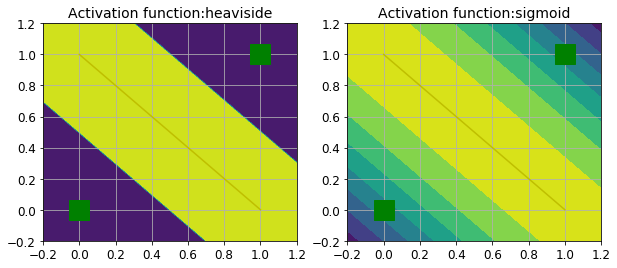

In [11]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmod)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], 'gs', markersize=20)
plt.plot([0, 1], [1, 0], 'y', markersize=20)
plt.title('Activation function:heaviside', fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], 'gs', markersize=20)
plt.plot([0, 1], [1, 0], 'y', markersize=20)
plt.title('Activation function:sigmoid', fontsize=14)
plt.grid(True)
plt.show()

In [12]:
from sklearn.datasets import fetch_mldata
import tensorflow as tf
# (X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [13]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [14]:
X_train = X_train.astype(np.float32).reshape(-1, 28*28)/255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28)/255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_vaild, X_train = X_train[:5000], X_train[5000:]
y_vaild, y_train = y_train[:5000], y_train[5000:]

In [15]:
feature_col = [tf.feature_column.numeric_column('X', shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300, 100], n_classes=10,
                                     feature_columns=feature_col)
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'X': X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True
)
dnn_clf.train(input_fn=input_fn)
# feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

# dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300, 100], n_classes=10,
#                                          feature_columns=feature_columns)
# dnn_clf.fit(x=X_train, y=y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ADMINI~1\\AppData\\Local\\Temp\\tmpp20scy8o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000010232208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for

INFO:tensorflow:global_step/sec: 220.738
INFO:tensorflow:loss = 0.34319282, step = 6001 (0.453 sec)
INFO:tensorflow:global_step/sec: 273.957
INFO:tensorflow:loss = 1.1569674, step = 6101 (0.365 sec)
INFO:tensorflow:global_step/sec: 271.724
INFO:tensorflow:loss = 0.16001174, step = 6201 (0.368 sec)
INFO:tensorflow:global_step/sec: 282.47
INFO:tensorflow:loss = 0.1770759, step = 6301 (0.354 sec)
INFO:tensorflow:global_step/sec: 276.993
INFO:tensorflow:loss = 1.0747418, step = 6401 (0.361 sec)
INFO:tensorflow:global_step/sec: 268.802
INFO:tensorflow:loss = 1.6076994, step = 6501 (0.372 sec)
INFO:tensorflow:global_step/sec: 230.402
INFO:tensorflow:loss = 0.15807337, step = 6601 (0.436 sec)
INFO:tensorflow:global_step/sec: 214.58
INFO:tensorflow:loss = 0.36477265, step = 6701 (0.465 sec)
INFO:tensorflow:global_step/sec: 239.795
INFO:tensorflow:loss = 0.26333618, step = 6801 (0.416 sec)
INFO:tensorflow:global_step/sec: 272.464
INFO:tensorflow:loss = 0.45710456, step = 6901 (0.367 sec)
INFO:t

INFO:tensorflow:global_step/sec: 232.005
INFO:tensorflow:loss = 0.92918473, step = 14201 (0.431 sec)
INFO:tensorflow:global_step/sec: 285.698
INFO:tensorflow:loss = 0.16001241, step = 14301 (0.350 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.32547528, step = 14401 (0.349 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.047353648, step = 14501 (0.349 sec)
INFO:tensorflow:global_step/sec: 288.168
INFO:tensorflow:loss = 0.03469992, step = 14601 (0.348 sec)
INFO:tensorflow:global_step/sec: 284.884
INFO:tensorflow:loss = 0.3386453, step = 14701 (0.350 sec)
INFO:tensorflow:global_step/sec: 285.698
INFO:tensorflow:loss = 0.10998151, step = 14801 (0.350 sec)
INFO:tensorflow:global_step/sec: 287.34
INFO:tensorflow:loss = 0.114321396, step = 14901 (0.348 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.1330115, step = 15001 (0.349 sec)
INFO:tensorflow:global_step/sec: 288.168
INFO:tensorflow:loss = 0.10117053, step = 15101 (0.

INFO:tensorflow:loss = 0.074215546, step = 22301 (0.350 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.00936841, step = 22401 (0.349 sec)
INFO:tensorflow:global_step/sec: 282.47
INFO:tensorflow:loss = 0.024746226, step = 22501 (0.354 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.019625153, step = 22601 (0.349 sec)
INFO:tensorflow:global_step/sec: 284.884
INFO:tensorflow:loss = 0.0039109006, step = 22701 (0.351 sec)
INFO:tensorflow:global_step/sec: 284.075
INFO:tensorflow:loss = 0.019420989, step = 22801 (0.353 sec)
INFO:tensorflow:global_step/sec: 282.47
INFO:tensorflow:loss = 0.025871268, step = 22901 (0.353 sec)
INFO:tensorflow:global_step/sec: 287.34
INFO:tensorflow:loss = 0.06795317, step = 23001 (0.348 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.039149936, step = 23101 (0.349 sec)
INFO:tensorflow:global_step/sec: 287.34
INFO:tensorflow:loss = 0.021641642, step = 23201 (0.348 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:loss = 0.02586846, step = 30401 (0.403 sec)
INFO:tensorflow:global_step/sec: 238.082
INFO:tensorflow:loss = 0.08019397, step = 30501 (0.423 sec)
INFO:tensorflow:global_step/sec: 230.401
INFO:tensorflow:loss = 0.023708705, step = 30601 (0.432 sec)
INFO:tensorflow:global_step/sec: 240.95
INFO:tensorflow:loss = 0.069905736, step = 30701 (0.415 sec)
INFO:tensorflow:global_step/sec: 225.721
INFO:tensorflow:loss = 0.02536133, step = 30801 (0.443 sec)
INFO:tensorflow:global_step/sec: 262.452
INFO:tensorflow:loss = 0.039807066, step = 30901 (0.380 sec)
INFO:tensorflow:global_step/sec: 268.081
INFO:tensorflow:loss = 0.00053770136, step = 31001 (0.374 sec)
INFO:tensorflow:global_step/sec: 211.852
INFO:tensorflow:loss = 0.021694392, step = 31101 (0.473 sec)
INFO:tensorflow:global_step/sec: 253.793
INFO:tensorflow:loss = 0.0069871494, step = 31201 (0.392 sec)
INFO:tensorflow:global_step/sec: 211.852
INFO:tensorflow:loss = 0.011556258, step = 31301 (0.473 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 284.884
INFO:tensorflow:loss = 0.026826128, step = 38501 (0.352 sec)
INFO:tensorflow:global_step/sec: 284.884
INFO:tensorflow:loss = 0.035039105, step = 38601 (0.350 sec)
INFO:tensorflow:global_step/sec: 284.884
INFO:tensorflow:loss = 0.031870726, step = 38701 (0.351 sec)
INFO:tensorflow:global_step/sec: 287.34
INFO:tensorflow:loss = 0.023543352, step = 38801 (0.349 sec)
INFO:tensorflow:global_step/sec: 285.698
INFO:tensorflow:loss = 0.0060877046, step = 38901 (0.349 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.04752373, step = 39001 (0.349 sec)
INFO:tensorflow:global_step/sec: 287.34
INFO:tensorflow:loss = 0.0041955495, step = 39101 (0.349 sec)
INFO:tensorflow:global_step/sec: 284.884
INFO:tensorflow:loss = 0.0013367509, step = 39201 (0.350 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.008344268, step = 39301 (0.349 sec)
INFO:tensorflow:global_step/sec: 286.517
INFO:tensorflow:loss = 0.016890785, step 

In [16]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={'X': X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-22-08:44:14
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpp20scy8o\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-22-08:44:14
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9781, average_loss = 0.11656545, global_step = 44000, loss = 14.755121
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\ADMINI~1\AppData\Local\Temp\tmpp20scy8o\model.ckpt-44000


In [17]:
eval_results

{'accuracy': 0.9781,
 'average_loss': 0.11656545,
 'global_step': 44000,
 'loss': 14.755121}

In [18]:
# feature_columns = [tf.feature_column.numeric_column('X',shape=[28*28])]
# dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100]
#                                          ,n_classes=10
#                                         ,feature_columns= feature_columns)
# input_fn = tf.estimator.inputs.numpy_input_fn(x={'X':X_train},y =y_train,
#                                              num_epochs = 40,batch_size = 50,
#                                              shuffle = True)
# dnn_clf.train(input_fn = input_fn)


def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [19]:
from sklearn.metrics import accuracy_score

# test_input_fn  = tf.estimator.inputs.numpy_input_fn(
#     x={"X": X_test}, y=y_test, shuffle=False)
# eval_results = dnn_clf.evaluate(input_fn=test_input_fn)
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ADMINI~1\AppData\Local\Temp\tmpp20scy8o\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7], dtype=int64),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -2.5997999,  -6.9737453,   0.6014334,   3.5745692,  -6.57534  ,
        -10.308645 , -22.906376 ,  23.317924 ,  -2.853572 ,   4.9604764],
       dtype=float32),
 'probabilities': array([5.5472181e-12, 6.9902858e-14, 1.3625517e-10, 2.6642191e-09,
        1.0411662e-13, 2.4898059e-15, 8.4147533e-21, 1.0000000e+00,
        4.3039092e-12, 1.0652741e-08], dtype=float32)}

构造

In [33]:
import tensorflow as tf
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [21]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int64, shape=(None), name='y')

In [22]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name='weights')
        b = tf.Variable(tf.zeros([n_neurons]), name='biases')
        z = tf.matmul(X, W)+b
        if activation == 'relu':
            return tf.nn.relu(z)
        else:
            return z

In [23]:
with tf.name_scope('dnn'):
    hidden1 = neuron_layer(X, n_hidden1, 'hidden1', activation='rule')
    hidden2 = neuron_layer(hidden1, n_hidden2, 'hidden2', activation='rule')
    logits = neuron_layer(hidden2, n_outputs, 'outputs')

In [24]:
from tensorflow.contrib.layers import fully_connected
with tf.name_scope('dnn'):
    hidden1 = fully_connected(X, n_hidden1, scope='hidden1')
    hidden2 = fully_connected(hidden1, n_hidden2, scope='hidden2')
    logits = fully_connected(hidden2, n_inputs, scope='outputs',
                             activation_fn=None)

In [25]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(
        X, n_hidden1, name='hidden1', activation=tf.nn.relu)
    hidden2 = tf.layers.dense(
        hidden1, n_hidden2, name='hidden2', activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_inputs, name='output')

In [26]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')

In [27]:
learning_rate = 0.01
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [28]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [29]:
init = tf.global_variables_initializer()
saver =tf.train.Saver()

In [30]:
from tensorflow.examples.tutorials.mnist import input_data
n_epochs = 20
batch_size = 50
mnist = input_data.read_data_sets('/temp/data/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /temp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /temp/data/train-labels-idx1-ubyte.gz
Extracting /temp/data/t10k-images-idx3-ubyte.gz
Extracting /temp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [31]:
n_epochs = 20
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples//batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(
            feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, 'Train accuracy', acc_train,
              'Test accuracy', acc_test)
#     save_path = saver.save(sess,'my_model_final.ckpt')

0 Train accuracy 0.86 Test accuracy 0.881
1 Train accuracy 0.92 Test accuracy 0.9078
2 Train accuracy 0.88 Test accuracy 0.9194
3 Train accuracy 0.94 Test accuracy 0.9259
4 Train accuracy 0.92 Test accuracy 0.9329
5 Train accuracy 0.92 Test accuracy 0.9339
6 Train accuracy 0.94 Test accuracy 0.9411
7 Train accuracy 0.92 Test accuracy 0.9458
8 Train accuracy 0.88 Test accuracy 0.9492
9 Train accuracy 0.94 Test accuracy 0.9509
10 Train accuracy 0.96 Test accuracy 0.953
11 Train accuracy 0.92 Test accuracy 0.956
12 Train accuracy 1.0 Test accuracy 0.9575
13 Train accuracy 0.92 Test accuracy 0.958
14 Train accuracy 1.0 Test accuracy 0.9605
15 Train accuracy 0.98 Test accuracy 0.9623
16 Train accuracy 1.0 Test accuracy 0.9647
17 Train accuracy 0.98 Test accuracy 0.9655
18 Train accuracy 0.98 Test accuracy 0.9675
19 Train accuracy 0.98 Test accuracy 0.9679


Excercise solutions

In [69]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [71]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_hidden3 = 50
n_outputs = 10

In [72]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name='X')
y = tf.placeholder(tf.int32, shape=(None), name='y')

In [73]:
with tf.name_scope('dnn'):
    hidden1 = tf.layers.dense(X, n_hidden1,
                              name='hidden1', activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2,
                              name='hidden2', activation=tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3,
                              name='hidden3', activation=tf.nn.relu)
    logits = tf.layers.dense(hidden3, n_outputs, name='output')

In [74]:
with tf.name_scope('loss'):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name='loss')
    loss_summary = tf.summary.scalar('log_loss', loss)

In [75]:
learning_rate = 0.01

with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [76]:
with tf.name_scope('eval'):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [77]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [78]:
from datetime import datetime


def log_dir(prefix=''):
    now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
    root_logdir = 'tf.logs'
    if prefix:
        prefix += '-'
    name = prefix+'run-'+now
    return '{}/{}/'.format(root_logdir, name)

In [79]:
logdir = log_dir('mnist_dnn')

In [80]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())\

In [66]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [81]:
m, n = X_train.shape

In [82]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m/batch_size))

# checkpoint_path = ''
# checkpoint_epoch_path =''
# final_model_path = ''

best_loss = np.infty
epoch_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    start_epoch = 0
    sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run(
            [accuracy, loss, accuracy_summary, loss_summary],
            feed_dict={X: X_valid, y: y_valid})

        if epoch % 5 == 0:
            print('Epoch:', epoch,
                  '\tValiddation accuracy:{:.3f}'.format(accuracy_val*100),
                  '\tLoss:{:.5f}'.format(loss_val))
            if loss_val < best_loss:
                best_loss = loss_val
            else:
                epoch_without_progress += 5
                if epoch_without_progress > max_epochs_without_progress:
                    print('Early stopping')
                    break

Epoch: 0 	Validdation accuracy:90.960 	Loss:0.33501
Epoch: 5 	Validdation accuracy:95.260 	Loss:0.16133
Epoch: 10 	Validdation accuracy:96.900 	Loss:0.10667
Epoch: 15 	Validdation accuracy:97.420 	Loss:0.08717
Epoch: 20 	Validdation accuracy:97.640 	Loss:0.07794
Epoch: 25 	Validdation accuracy:97.880 	Loss:0.07307
Epoch: 30 	Validdation accuracy:97.920 	Loss:0.07577
Epoch: 35 	Validdation accuracy:97.860 	Loss:0.07612
Epoch: 40 	Validdation accuracy:98.000 	Loss:0.07271
Epoch: 45 	Validdation accuracy:98.020 	Loss:0.07150
Epoch: 50 	Validdation accuracy:98.040 	Loss:0.07462
Epoch: 55 	Validdation accuracy:98.100 	Loss:0.07510
Epoch: 60 	Validdation accuracy:98.060 	Loss:0.07821
Epoch: 65 	Validdation accuracy:98.160 	Loss:0.07838
Epoch: 70 	Validdation accuracy:98.140 	Loss:0.08001
Epoch: 75 	Validdation accuracy:98.120 	Loss:0.08013
Epoch: 80 	Validdation accuracy:98.140 	Loss:0.08118
Epoch: 85 	Validdation accuracy:98.160 	Loss:0.08219
Epoch: 90 	Validdation accuracy:98.120 	Loss:0.0